In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
thebank =  pd.read_csv('bank.csv', sep=';')

In [3]:
thebank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank = thebank.copy()

### RESAMPLE 'YES' TO BE SAME NUMBER AS 'NO'

In [5]:
from sklearn.utils import resample

# create a variable yes and no to keep the target(yes and no)
no = bank[bank['y'] == 'no']
yes = bank[bank['y'] == 'yes']

In [6]:
# resample to get equal number of yes and no
upscaledYes = resample(yes, replace=True, n_samples=len(no), random_state=42)

In [7]:
# concatenate the no and the new yes
bank = pd.concat([no, upscaledYes])

In [9]:
bank.shape

(8000, 17)

# GET A TEST SET

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(bank, bank['y']):
    train = bank.loc[train_index]
    test = bank.loc[test_index]



C:\Users\Iyanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\Iyanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


In [11]:
train['y'].value_counts()

yes    3217
no     3185
Name: y, dtype: int64

In [12]:
train['y'].shape

(9193,)

In [13]:
thebank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [14]:
bank = train.copy()

# CHANGE SOME ATTRIBUTES

In [14]:
def change(data, column):
    new = []
    for value in data[column]:
        if value == 'yes':
            new.append(1)
        else:
            new.append(0)
    return new

In [15]:
bank['y'] = change(bank, 'y')
bank['default'] = change(bank, 'default')
bank['housing'] = change(bank, 'housing')
bank['loan'] = change(bank, 'loan')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010BC1F38860>,
      dtype=object)

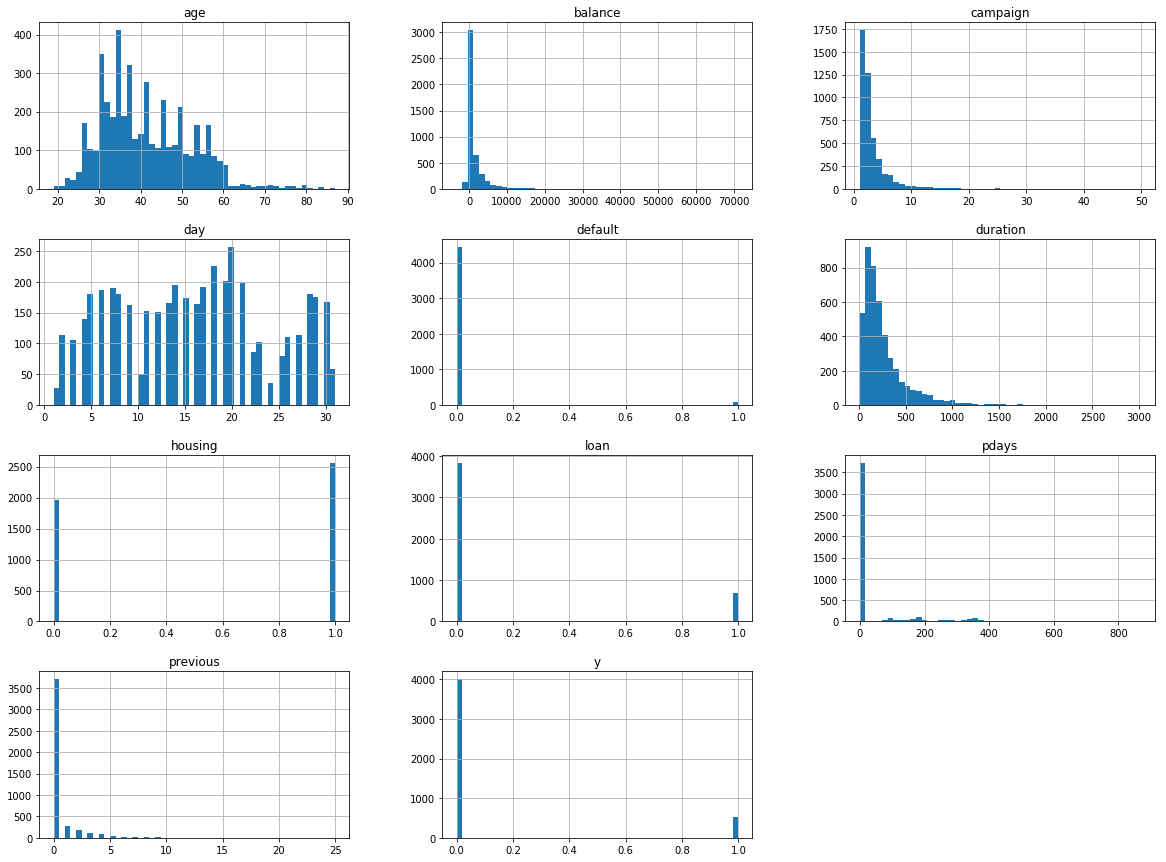

In [16]:
bank.hist(figsize=(20,15), bins=50)

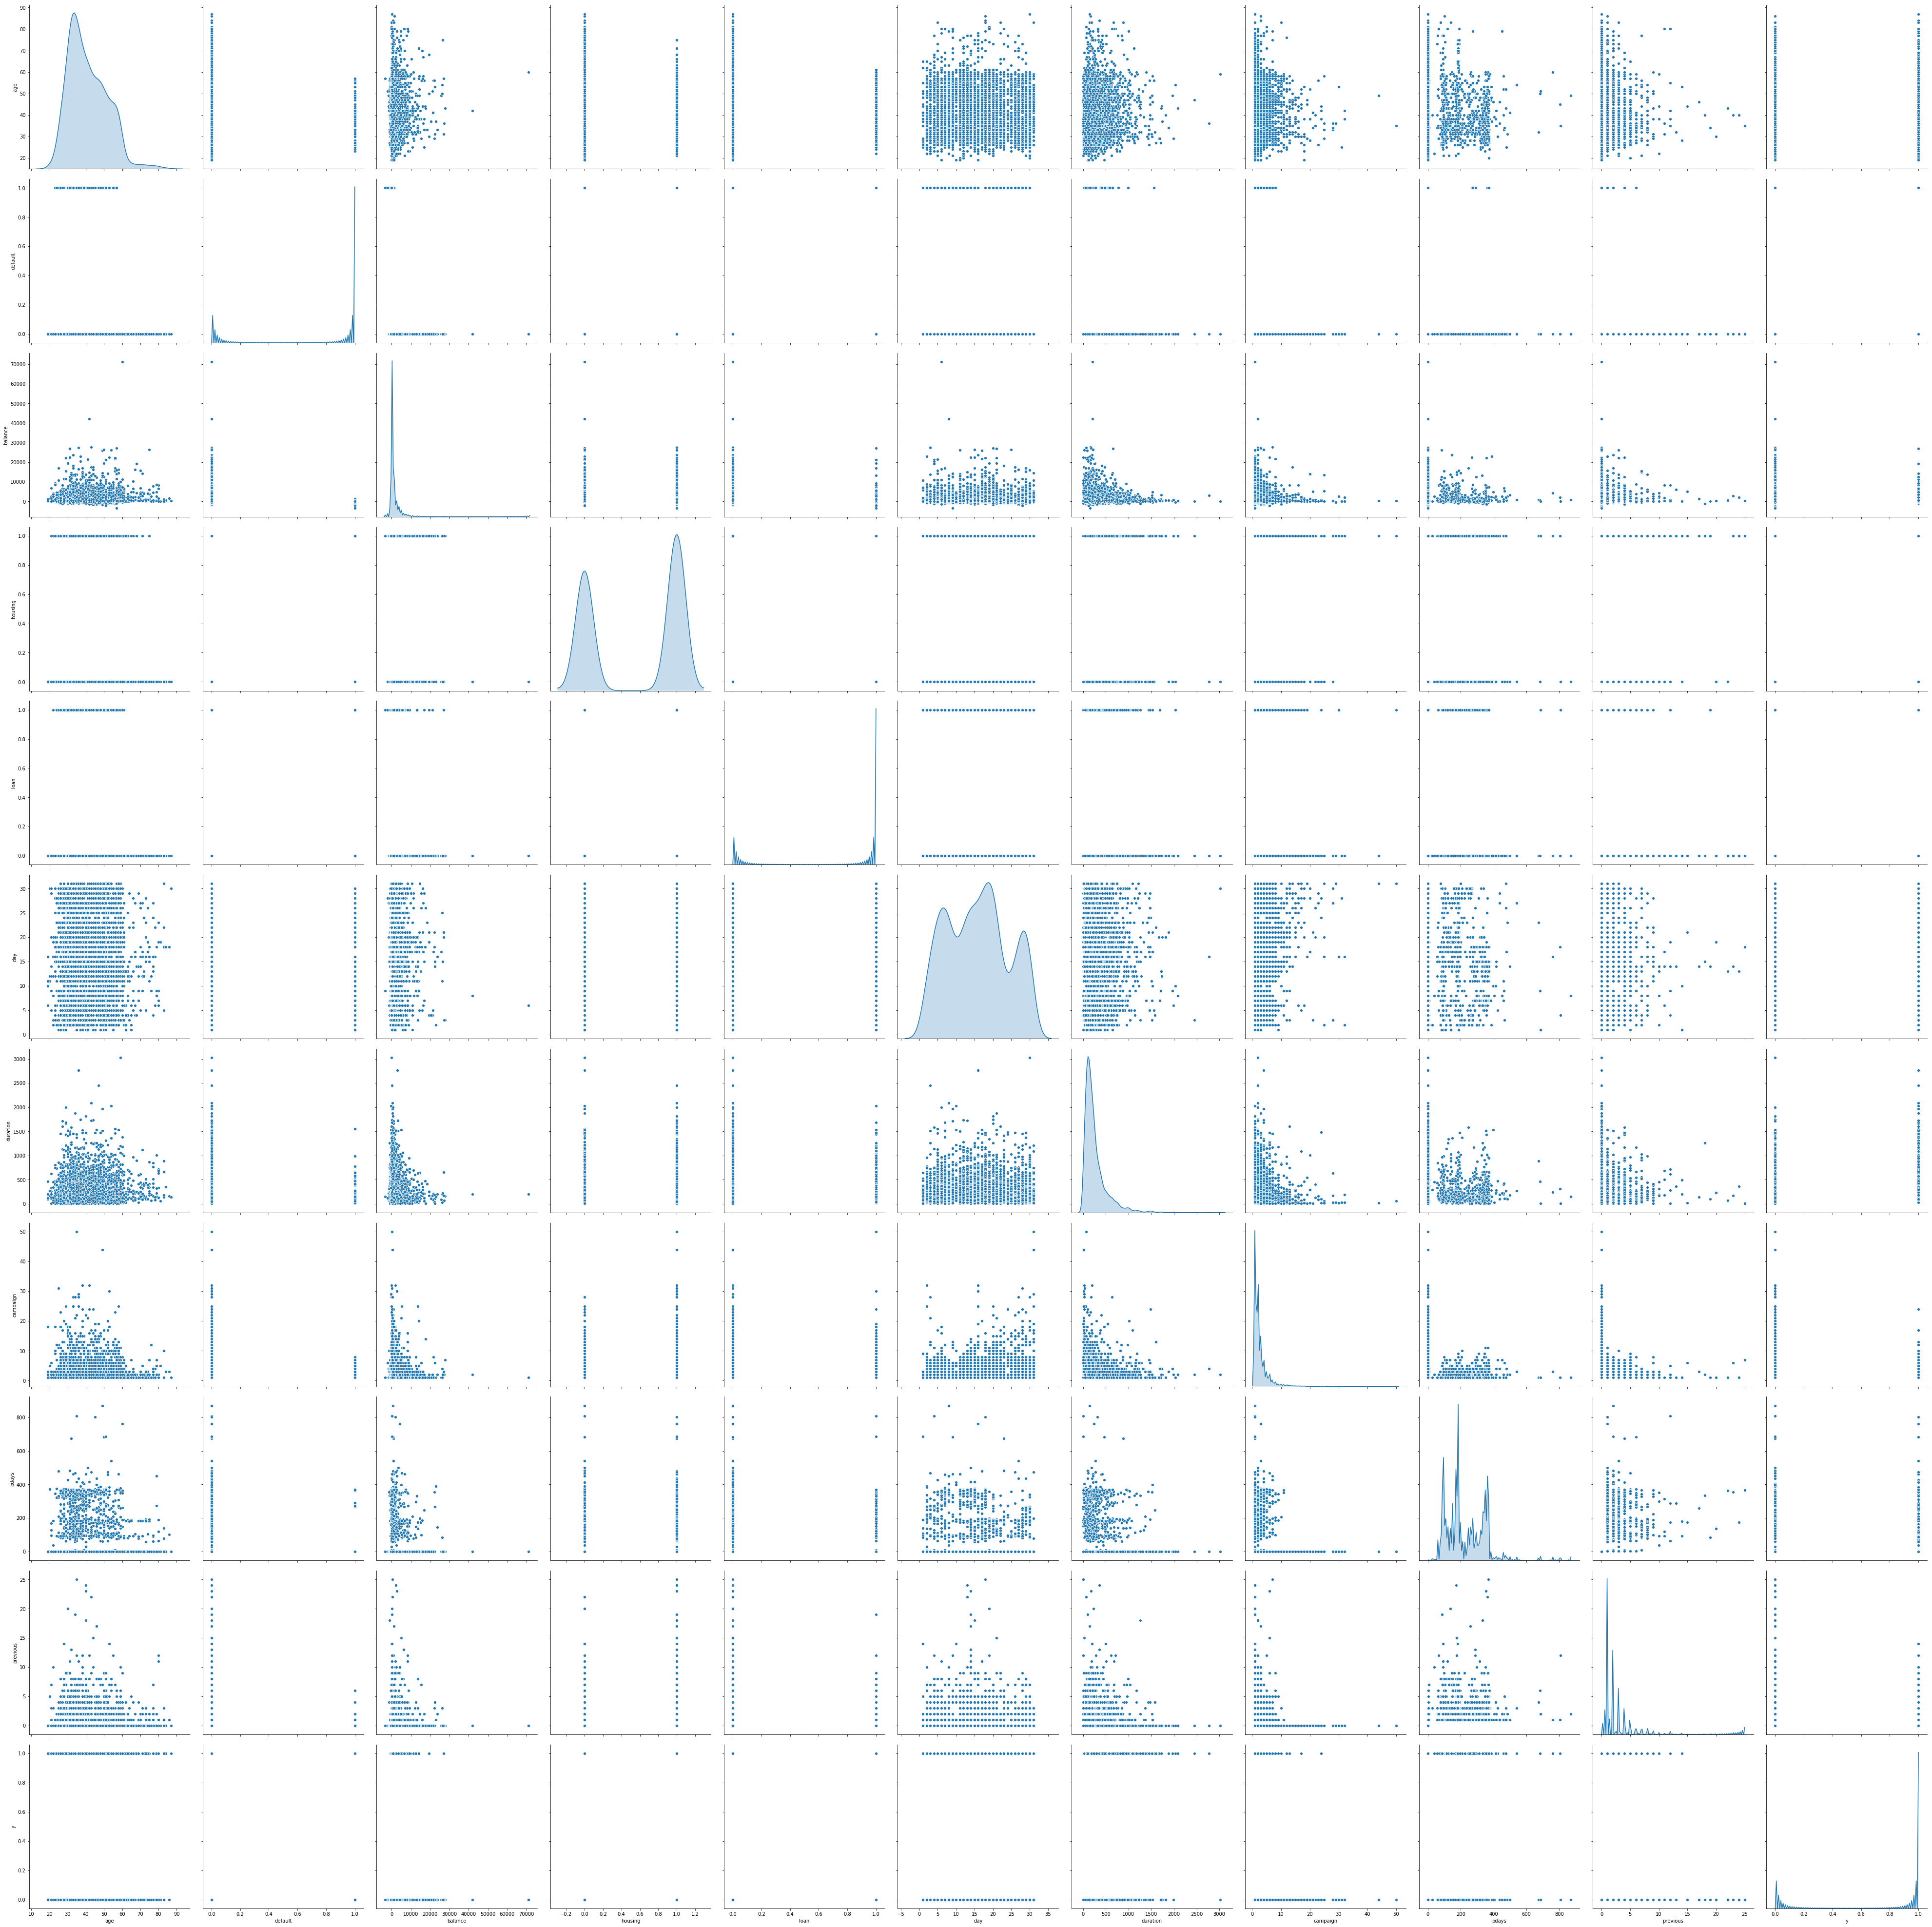

In [17]:
sns.pairplot(bank, diag_kind='kde', height=5)

In [17]:
sns.pairplot(bank, height=10)

In [12]:
# scatterplot is the same as pairplot

# HOUSING

In [18]:
pd.crosstab([bank["housing"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
housing,,,
0,1318,1887,3205
1,1881,1312,3193
All,3199,3199,6398


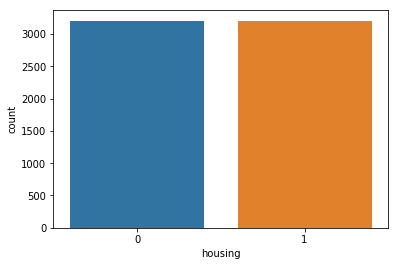

In [19]:
sns.countplot(bank['housing'])

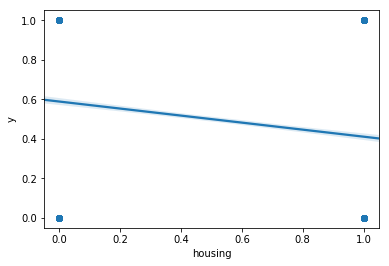

In [20]:
sns.regplot('housing', 'y', data=bank)

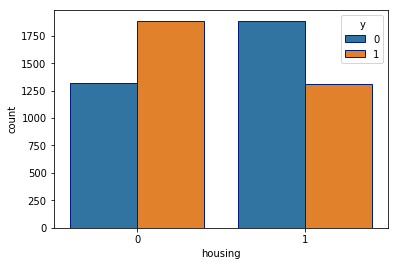

In [21]:
sns.countplot("housing", hue = "y", data = bank, edgecolor=sns.color_palette("dark", 1))

In [22]:
bank.corr()['housing']

age        -0.213831
default    -0.018078
balance    -0.060584
housing     1.000000
loan        0.055874
day        -0.022614
duration    0.041893
campaign    0.048300
pdays       0.093832
previous    0.006025
y          -0.177868
Name: housing, dtype: float64

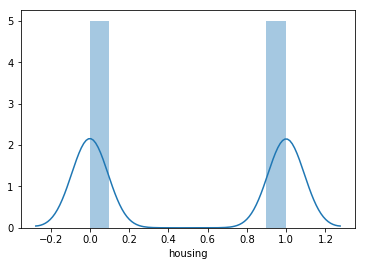

In [23]:
sns.distplot(bank['housing'])

# LOAN

In [24]:
pd.crosstab([bank["loan"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
loan,,,
0,2674,2936,5610
1,525,263,788
All,3199,3199,6398


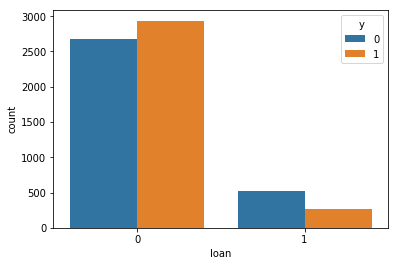

In [25]:
sns.countplot('loan', hue='y', data=bank)

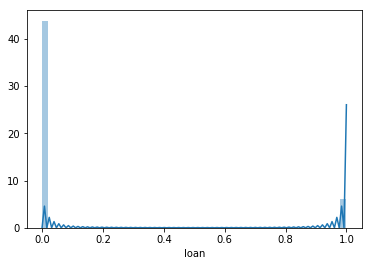

In [26]:
sns.distplot(bank['loan'])

In [27]:
bank.corr()['loan']

age        -0.051880
default     0.105556
balance    -0.078357
housing     0.055874
loan        1.000000
day         0.016092
duration    0.012310
campaign    0.048701
pdays      -0.035212
previous   -0.031025
y          -0.124611
Name: loan, dtype: float64

In [23]:
# it has a correlation of -0.07 with target...
# *** shaky

# DEFAULT

In [28]:
pd.crosstab([bank["default"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
default,,,
0,3138,3123,6261
1,61,76,137
All,3199,3199,6398


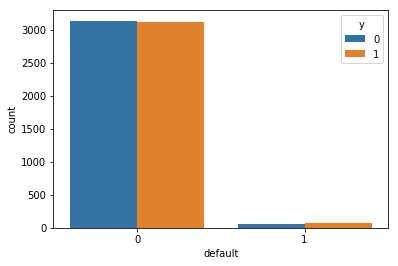

In [29]:
sns.countplot('default', hue='y', data=bank)

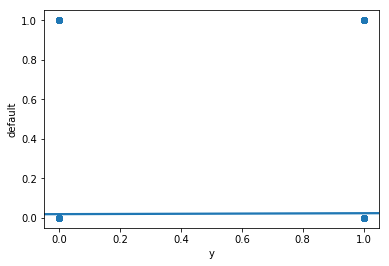

In [30]:
sns.regplot('y', 'default', data=bank)

In [31]:
bank.corr()['default']

age        -0.008495
default     1.000000
balance    -0.090151
housing    -0.018078
loan        0.105556
day         0.000991
duration    0.016374
campaign   -0.034382
pdays      -0.047372
previous   -0.051299
y           0.016196
Name: default, dtype: float64

In [28]:
# shaky... 
# advise to drop

# AGE

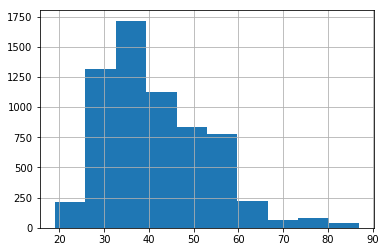

In [32]:
bank['age'].hist()

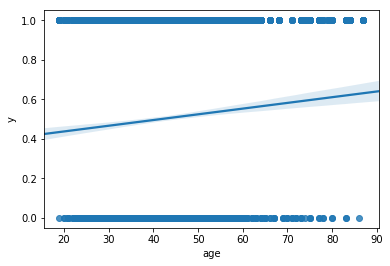

In [33]:
sns.regplot('age', 'y', data=bank)

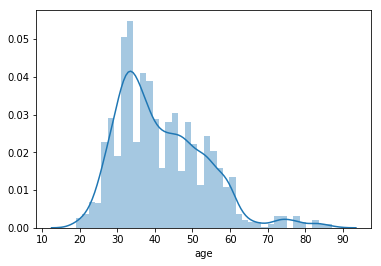

In [34]:
sns.distplot(bank['age'])

In [35]:
bank.corr()['age']

age         1.000000
default    -0.008495
balance     0.111398
housing    -0.213831
loan       -0.051880
day        -0.035006
duration    0.001669
campaign   -0.028810
pdays       0.025049
previous   -0.029439
y           0.067752
Name: age, dtype: float64

# DURATION

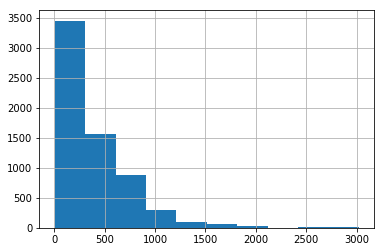

In [36]:
bank['duration'].hist()

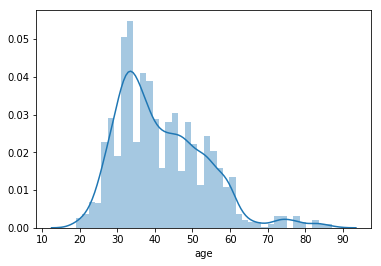

In [37]:
sns.distplot(bank['age'])

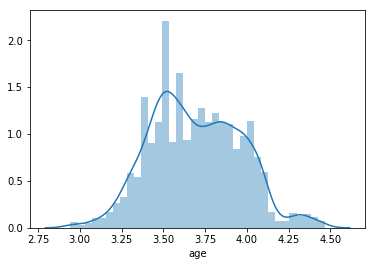

In [38]:
sns.distplot(np.log(bank['age']))

In [39]:
newage = np.log(bank['age'])
bank['newage'] = newage

In [40]:
bank.corr()['y']

age         0.067752
default     0.016196
balance     0.042537
housing    -0.177868
loan       -0.124611
day        -0.031583
duration    0.468220
campaign   -0.109934
pdays       0.136553
previous    0.150044
y           1.000000
newage      0.041861
Name: y, dtype: float64

In [41]:
bank.drop('newage', axis=1, inplace=True)

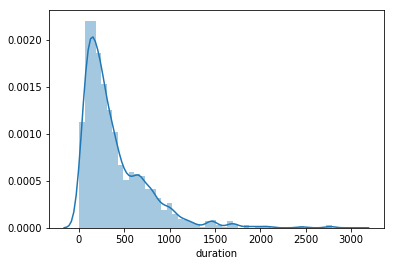

In [42]:
sns.distplot(bank['duration'])

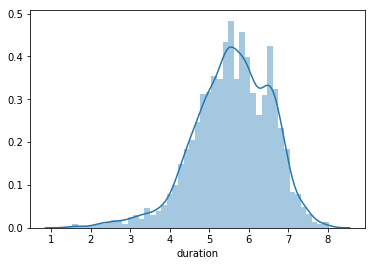

In [43]:
sns.distplot(np.log(bank['duration']))

In [44]:
newduration = np.log(bank['duration'])
bank['newduration'] = newduration

In [47]:
bank.corr()['y']

age            0.067752
default        0.016196
balance        0.042537
housing       -0.177868
loan          -0.124611
day           -0.031583
duration       0.468220
campaign      -0.109934
pdays          0.136553
previous       0.150044
y              1.000000
newduration    0.538040
Name: y, dtype: float64

In [48]:
bank.drop('duration', axis=1, inplace=True)

# CAMPAIGN

In [49]:
bank['campaign'].describe()

count    6398.000000
mean        2.563145
std         2.737085
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        50.000000
Name: campaign, dtype: float64

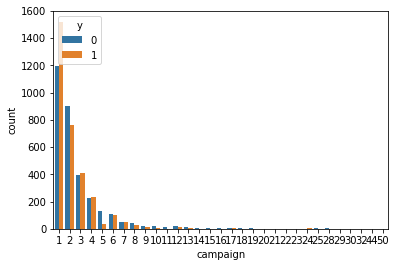

In [50]:
sns.countplot('campaign', hue='y', data=bank)

In [51]:
bank.corr()['campaign']

age           -0.028810
default       -0.034382
balance       -0.022701
housing        0.048300
loan           0.048701
day            0.168644
campaign       1.000000
pdays         -0.094712
previous      -0.081518
y             -0.109934
newduration   -0.106772
Name: campaign, dtype: float64

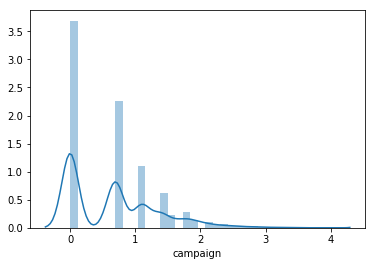

In [52]:
sns.distplot(np.log(bank['campaign']))

# DAY

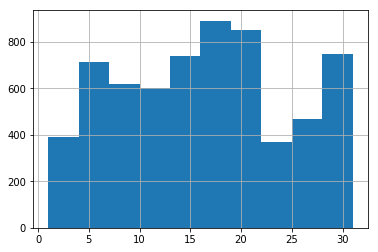

In [53]:
bank['day'].hist()

In [54]:
bank.corr()['day']

age           -0.035006
default        0.000991
balance       -0.012222
housing       -0.022614
loan           0.016092
day            1.000000
campaign       0.168644
pdays         -0.086489
previous      -0.059431
y             -0.031583
newduration   -0.039230
Name: day, dtype: float64

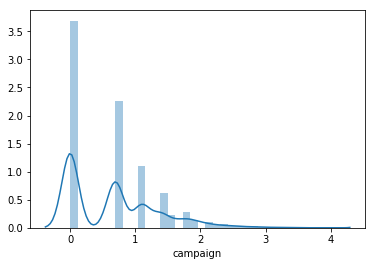

In [55]:
sns.distplot(np.log(bank['campaign']))

# PDAYs

In [56]:
bank.corr()['pdays']

age            0.025049
default       -0.047372
balance        0.020843
housing        0.093832
loan          -0.035212
day           -0.086489
campaign      -0.094712
pdays          1.000000
previous       0.565039
y              0.136553
newduration    0.015329
Name: pdays, dtype: float64

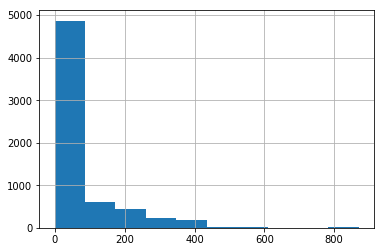

In [57]:
bank['pdays'].hist()

# PREVIOUS

In [58]:
bank.corr()['previous']

age           -0.029439
default       -0.051299
balance        0.021547
housing        0.006025
loan          -0.031025
day           -0.059431
campaign      -0.081518
pdays          0.565039
previous       1.000000
y              0.150044
newduration    0.023882
Name: previous, dtype: float64

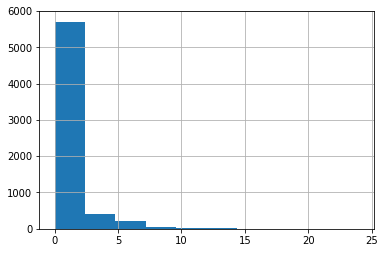

In [59]:
bank['previous'].hist()

In [60]:
pd.crosstab([bank["previous"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
previous,,,
0,2679,2075,4754
1,185,333,518
2,124,307,431
3,79,166,245
4,45,124,169
5,27,90,117
6,12,37,49
7,18,23,41
8,13,14,27


## CATEGORICAL FEATURES

# JOB

In [61]:
pd.crosstab([bank["job"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
job,,,
admin.,334,396,730
blue-collar,718,422,1140
entrepreneur,122,92,214
housemaid,76,71,147
management,668,827,1495
retired,130,297,427
self-employed,131,101,232
services,289,236,525
student,48,114,162


In [62]:
bank['job'].value_counts()

management       1495
blue-collar      1140
technician       1097
admin.            730
services          525
retired           427
self-employed     232
entrepreneur      214
student           162
unemployed        148
housemaid         147
unknown            81
Name: job, dtype: int64

In [63]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values='unknown', strategy='most_frequent')

In [64]:
job = impute.fit_transform(bank['job'].values.reshape(-1, 1))

In [65]:
bank['job'] = job

In [66]:
bank['job'].value_counts()

management       1576
blue-collar      1140
technician       1097
admin.            730
services          525
retired           427
self-employed     232
entrepreneur      214
student           162
unemployed        148
housemaid         147
Name: job, dtype: int64

In [67]:
pd.crosstab([bank["job"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
job,,,
admin.,334,396,730
blue-collar,718,422,1140
entrepreneur,122,92,214
housemaid,76,71,147
management,690,886,1576
retired,130,297,427
self-employed,131,101,232
services,289,236,525
student,48,114,162


# MARITAL

In [68]:
pd.crosstab([bank["marital"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
marital,,,
divorced,366,512,878
married,2003,1679,3682
single,830,1008,1838
All,3199,3199,6398


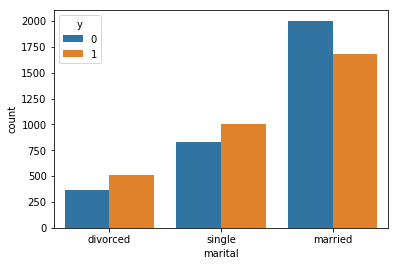

In [69]:
sns.countplot("marital", hue = "y", data = bank) #  edgecolor=sns.color_palette("dark", 3)


# EDUCATION

In [70]:
pd.crosstab([bank["education"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
education,,,
primary,498,380,878
secondary,1641,1528,3169
tertiary,926,1151,2077
unknown,134,140,274
All,3199,3199,6398


In [71]:
bank['education'].value_counts()

secondary    3169
tertiary     2077
primary       878
unknown       274
Name: education, dtype: int64

In [72]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values='unknown', strategy='most_frequent')

In [73]:
education = impute.fit_transform(bank['education'].values.reshape(-1, 1))

In [74]:
bank['education'] = education

In [75]:
pd.crosstab([bank["education"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
education,,,
primary,498,380,878
secondary,1775,1668,3443
tertiary,926,1151,2077
All,3199,3199,6398


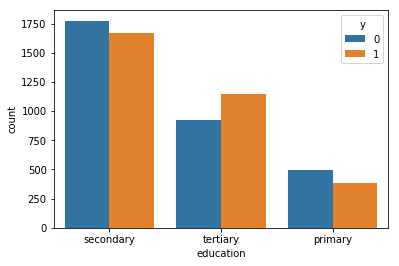

In [76]:
sns.countplot("education", hue = "y", data = bank) #  edgecolor=sns.color_palette("dark", 3)


# MONTH

In [77]:
bank['month'].value_counts()#.sort_values()

may    1599
aug     928
jul     893
jun     705
nov     571
apr     473
feb     351
oct     316
jan     204
sep     147
mar     144
dec      67
Name: month, dtype: int64

In [78]:
month = bank['month'].copy()

In [79]:
# The function below helps to categorize the month into three parts

In [80]:
new = []
for val in month:
    if val in ['jan', 'feb', 'mar', 'apr']:
        new.append('firstpart')
    elif val in ['may', 'jun', 'jul', 'aug']:
        new.append('secondpart')
    else:
        new.append('thirdpart')

In [81]:
bank['new'] = new

In [82]:
bank['newmonth'] = month

In [83]:
pd.crosstab([bank["new"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
new,,,
firstpart,464,708,1172
secondpart,2364,1761,4125
thirdpart,371,730,1101
All,3199,3199,6398


In [84]:
pd.crosstab([bank["month"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
month,,,
apr,185,288,473
aug,442,486,928
dec,9,58,67
feb,148,203,351
jan,111,93,204
jul,517,376,893
jun,379,326,705
mar,20,124,144
may,1026,573,1599


In [85]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,newduration,new,newmonth
2236,32,admin.,divorced,secondary,1,-18,1,0,unknown,12,may,3,-1,0,unknown,0,5.043425,secondpart,may
858,34,technician,single,tertiary,0,144,1,1,cellular,14,oct,1,85,19,failure,0,4.644391,thirdpart,oct
3531,44,management,divorced,tertiary,0,0,0,0,cellular,22,aug,2,-1,0,unknown,0,3.988984,secondpart,aug
2737,34,blue-collar,married,secondary,0,8309,1,1,cellular,19,nov,1,-1,0,unknown,0,3.912023,thirdpart,nov
1257,51,blue-collar,married,primary,0,5050,0,1,unknown,16,jun,7,-1,0,unknown,0,4.317488,secondpart,jun


In [86]:
def oneHotEncoding(data, col):
    return pd.get_dummies(data, columns=col)

In [87]:
oneHotEncoding(bank, ['newmonth', 'new']).corr()['y']

age               0.067752
default           0.016196
balance           0.042537
housing          -0.177868
loan             -0.124611
day              -0.031583
campaign         -0.109934
pdays             0.136553
previous          0.150044
y                 1.000000
newduration       0.538040
newmonth_apr      0.061527
newmonth_aug      0.019529
newmonth_dec      0.075235
newmonth_feb      0.037752
newmonth_jan     -0.016013
newmonth_jul     -0.063594
newmonth_jun     -0.026455
newmonth_mar      0.109591
newmonth_may     -0.163530
newmonth_nov     -0.018091
newmonth_oct      0.183218
newmonth_sep      0.092845
new_firstpart     0.098592
new_secondpart   -0.196927
new_thirdpart     0.148657
Name: y, dtype: float64

#### This shows that 'quarterly month' relates with 'y' better than 'month'

In [88]:
bank.drop(['new', 'newmonth', 'month'], axis=1, inplace=True)

In [89]:
bank['month'] = new

In [90]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,campaign,pdays,previous,poutcome,y,newduration,month
2236,32,admin.,divorced,secondary,1,-18,1,0,unknown,12,3,-1,0,unknown,0,5.043425,secondpart
858,34,technician,single,tertiary,0,144,1,1,cellular,14,1,85,19,failure,0,4.644391,thirdpart
3531,44,management,divorced,tertiary,0,0,0,0,cellular,22,2,-1,0,unknown,0,3.988984,secondpart
2737,34,blue-collar,married,secondary,0,8309,1,1,cellular,19,1,-1,0,unknown,0,3.912023,thirdpart
1257,51,blue-collar,married,primary,0,5050,0,1,unknown,16,7,-1,0,unknown,0,4.317488,secondpart


In [91]:
bank['y'].value_counts()

1    3199
0    3199
Name: y, dtype: int64

# POUTCOME

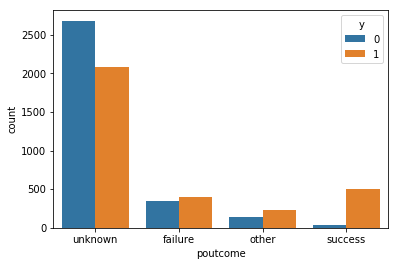

In [92]:
sns.countplot("poutcome", hue = "y", data=bank)

In [93]:
bank['poutcome'].value_counts()

unknown    4754
failure     746
success     540
other       358
Name: poutcome, dtype: int64

In [94]:
len(bank['poutcome'])

6398

In [95]:
(3705/4521)*100

81.95089581950896

In [96]:
# sergeant, advise to drop 'poutcome'

In [97]:
bank = bank.drop('poutcome', axis=1)

# CONTACT

In [98]:
bank['contact'].value_counts() #.plot.bar()

cellular     4551
unknown      1385
telephone     462
Name: contact, dtype: int64

In [99]:
(1324/4521)*100

29.285556292855563

In [220]:
# replace unknown and check 

# BALANCE

In [100]:
bank.corr()['balance']

age            0.111398
default       -0.090151
balance        1.000000
housing       -0.060584
loan          -0.078357
day           -0.012222
campaign      -0.022701
pdays          0.020843
previous       0.021547
y              0.042537
newduration   -0.025986
Name: balance, dtype: float64

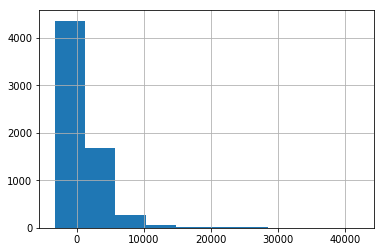

In [101]:
bank['balance'].hist()

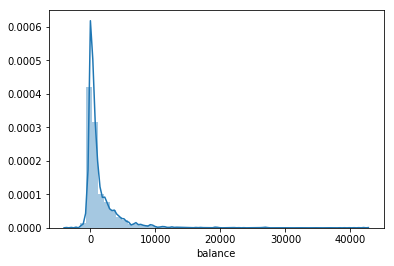

In [102]:
sns.distplot(bank['balance'])

In [103]:
pd.notnull(bank['balance']).any()

True

In [ ]:
sns.distplot(np.log(bank['balance']))

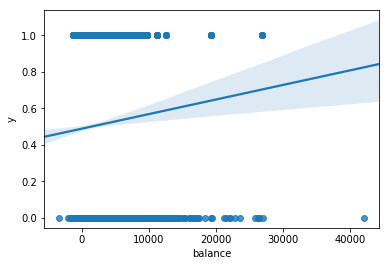

In [105]:
sns.regplot('balance', 'y', data=bank)

# CREATING PIPELINE

In [260]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import Imputer

##### gets a dataframe with the selected attributes

In [244]:

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        try:
            return X[self.attribute_names]
        except KeyError:
            return X


#### returns a dataframe

In [245]:
class ReturnDataframe(BaseEstimator, TransformerMixin):
    def __init__(self, attrib):
        self.attributes = attrib
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        try:
            return pd.DataFrame(X, columns=self.attributes)
        except KeyError:
            return X

#### gets the one hot encoding of the dataframe and returns the np.array

In [222]:
class OneHotEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return pd.get_dummies(X)

#### drop the attributes from dataframe

In [223]:

class DropDataframeColumn(BaseEstimator, TransformerMixin):
    def __init__(self, attrib):
        self.attributes = attrib
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        try:
            return X.drop(self.attributes, axis=1)
        except KeyError:
            return X

##### This works like change function which converts 'yes or no' to '1 or 0'

In [224]:

class ChangeFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, attrib):
        self.attributes = attrib
    def fit(self, X, y=None):
        return self
    
    # Try to reduce the order of growth
    def transform(self, X):
        total = []
        i = 0
        try:
            for value in X.loc[:, self.attributes]:
                new = []
                for val in X[value]:
                    if val == 'yes':
                        new.append(1)
                    elif val == 'no':
                        new.append(0)
                    else:
                        break
                total.append(new)
                if [] not in total:
                    X[self.attributes[i]] = total[i]
                i += 1
            return X
        except KeyError:
            return X

In [344]:

class MonthColumn(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        new = []
        try:
            for val in X.loc[:, 'month']:
                if val in ['jan', 'feb', 'mar', 'apr']:
                    new.append('firstpart')
                elif val in ['may', 'jun', 'jul', 'aug']:
                    new.append('secondpart')
                elif val in ['sep', 'oct', 'nov', 'dec']:
                    new.append('thirdpart')
                else:
                    pass
            X['month'] = new
            return X
        except ValueError:
            return X

In [197]:
try:
    for value in bank.loc[:,['duration']]:
        print(value)
except KeyError:
    pass

In [341]:
bank1 = train.copy()

In [227]:
a = MonthColumn().fit_transform(bank1)

In [228]:
a.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2236,32,admin.,divorced,secondary,yes,-18,yes,no,unknown,12,secondpart,155,3,-1,0,unknown,no
858,34,technician,single,tertiary,no,144,yes,yes,cellular,14,thirdpart,104,1,85,19,failure,no
3531,44,management,divorced,tertiary,no,0,no,no,cellular,22,secondpart,54,2,-1,0,unknown,no
2737,34,blue-collar,married,secondary,no,8309,yes,yes,cellular,19,thirdpart,50,1,-1,0,unknown,no
1257,51,blue-collar,married,primary,no,5050,no,yes,unknown,16,secondpart,75,7,-1,0,unknown,no


In [229]:
b = DataFrameSelector(cat_attrib).fit_transform(a)

In [230]:
b.head()

,job,marital,education,contact,month
2236,admin.,divorced,secondary,unknown,secondpart
858,technician,single,tertiary,cellular,thirdpart
3531,management,divorced,tertiary,cellular,secondpart
2737,blue-collar,married,secondary,cellular,thirdpart
1257,blue-collar,married,primary,unknown,secondpart


In [231]:
c = SimpleImputer(missing_values='unknown', strategy='most_frequent').fit_transform(b)

In [232]:
c

array([['admin.', 'divorced', 'secondary', 'cellular', 'secondpart'],
       ['technician', 'single', 'tertiary', 'cellular', 'thirdpart'],
       ['management', 'divorced', 'tertiary', 'cellular', 'secondpart'],
       ...,
       ['technician', 'married', 'secondary', 'cellular', 'secondpart'],
       ['services', 'single', 'secondary', 'cellular', 'secondpart'],
       ['blue-collar', 'married', 'secondary', 'cellular', 'thirdpart']],
      dtype=object)

In [233]:
d = ReturnDataframe(cat_attrib).fit_transform(c)

In [234]:
d.head()

,job,marital,education,contact,month
0,admin.,divorced,secondary,cellular,secondpart
1,technician,single,tertiary,cellular,thirdpart
2,management,divorced,tertiary,cellular,secondpart
3,blue-collar,married,secondary,cellular,thirdpart
4,blue-collar,married,primary,cellular,secondpart


In [235]:
e = OneHotEncoder().fit_transform(d)

In [236]:
e.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,month_firstpart,month_secondpart,month_thirdpart
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0


In [237]:
e.shape

(3616, 22)

In [238]:
# f = DropDataframeColumn(drop_attrib).fit_transform(e)

NameError: name 'drop_attrib' is not defined

In [684]:
# f.head()

,job_admin.,job_blue-collar,job_management,job_services,job_technician,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,month_firstpart,month_secondpart,month_thirdpart
0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0
3,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0


In [685]:
# f.shape

(3616, 16)

In [239]:
f = e

In [240]:
g = MonthColumn().fit_transform(f)

In [241]:
g.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,month_firstpart,month_secondpart,month_thirdpart
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0


In [242]:
g.shape

(3616, 22)

In [246]:
h = DataFrameSelector(cat_attrib).fit_transform(g)

In [247]:
h.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,month_firstpart,month_secondpart,month_thirdpart
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0


In [248]:
h.shape

(3616, 22)

### Choose the attributes

In [113]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,campaign,pdays,previous,y,newduration,month
2236,32,admin.,divorced,secondary,1,-18,1,0,unknown,12,3,-1,0,0,5.043425,secondpart
858,34,technician,single,tertiary,0,144,1,1,cellular,14,1,85,19,0,4.644391,thirdpart
3531,44,management,divorced,tertiary,0,0,0,0,cellular,22,2,-1,0,0,3.988984,secondpart
2737,34,blue-collar,married,secondary,0,8309,1,1,cellular,19,1,-1,0,0,3.912023,thirdpart
1257,51,blue-collar,married,primary,0,5050,0,1,unknown,16,7,-1,0,0,4.317488,secondpart


In [601]:
newbank = train.copy()

In [602]:
newbank.shape

(9193, 17)

In [606]:
newbank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3682,43.0,management,divorced,tertiary,no,497.0,no,no,cellular,13.0,may,66.0,1.0,363.0,22.0,failure,no
4533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1575,34.0,blue-collar,single,primary,no,464.0,yes,no,cellular,18.0,may,173.0,1.0,299.0,2.0,other,no
2553,33.0,management,married,tertiary,no,1064.0,yes,no,cellular,13.0,may,562.0,1.0,-1.0,0.0,unknown,yes


In [608]:
newbank = newbank.dropna(how='all')

In [611]:
pd.isnull(newbank).any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [613]:
newbank.shape

(6402, 17)

In [614]:
newbank['y'].value_counts()

yes    3217
no     3185
Name: y, dtype: int64

In [615]:
num_attrib = ['campaign', 'pdays', 'age', 'duration', 'day', 'balance']

In [616]:
cat_attrib = ['job', 'marital', 'month']

In [617]:
drop_attrib = ['job_entrepreneur', 'job_housemaid', 'job_student', 'job_unemployed', 'job_self-employed', 'job_retired'] 

In [618]:
tochange = ['loan', 'default', 'housing']

In [619]:
num_pipeline = Pipeline([
 ('selector', DataFrameSelector(num_attrib)),
 ('features', ChangeFeatures(tochange)),
 ('imputer', SimpleImputer(strategy='median')),
 ('std_scaler', StandardScaler()),
 ('new_selector', ReturnDataframe(num_attrib))

])

In [620]:
cat_pipeline = Pipeline([
 ('month', MonthColumn()),
 ('selector', DataFrameSelector(cat_attrib)),
 ('imputer', SimpleImputer(missing_values='unknown', strategy='most_frequent')),
 ('new_selector', ReturnDataframe(cat_attrib)),
 ('cat_encoder', OneHotEncoder()),
 ('drop_selector', DropDataframeColumn(drop_attrib))
])

In [621]:
output_pipeline = Pipeline([
 ('change', ChangeFeatures(['y'])),
 ('selector', DataFrameSelector(['y']))
])

In [622]:
full_pipeline = FeatureUnion(transformer_list=[
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
 ])

In [623]:
num_pipeline.fit_transform(newbank).columns

Index(['campaign', 'pdays', 'age', 'duration', 'day', 'balance'], dtype='object')

In [624]:

cat_pipeline.fit_transform(newbank).columns

Index(['job_admin.', 'job_blue-collar', 'job_management', 'job_services',
       'job_technician', 'marital_divorced', 'marital_married',
       'marital_single', 'month_firstpart', 'month_secondpart',
       'month_thirdpart'],
      dtype='object')

In [625]:
col_name = ['campaign', 'pdays', 'age', 'duration', 'day', 'balance'] + ['job_admin.', 'job_blue-collar', 'job_management', 'job_services',
       'job_technician', 'marital_divorced', 'marital_married',
       'marital_single', 'month_firstpart', 'month_secondpart',
       'month_thirdpart']
   

In [626]:
len(col_name)

17

In [627]:
X = full_pipeline.fit_transform(newbank)

In [628]:
y = output_pipeline.fit_transform(newbank)

In [629]:
X.shape

(6402, 17)

In [630]:
y.shape

(6402, 1)

In [631]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [632]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [633]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [634]:
dtc.fit(X, y)
rfc.fit(X, y)

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Iyanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [635]:
len(X)

6402

In [636]:
a = X[3600:]
b = y[3600:]

In [637]:
print("DTC Predictions:", dtc.predict(a))

DTC Predictions: [1 0 1 ... 0 0 0]


In [638]:
print("Labels:", b)

Labels:       y
4504  1
351   0
2213  1
2213  1
2213  1
2213  1
2213  1
2213  1
970   1
970   1
2720  0
3276  0
1776  0
2813  0
4409  0
2775  0
4029  0
4038  0
1353  0
1756  0
1359  0
1927  1
1927  1
1927  1
1927  1
1927  1
1927  1
1927  1
3086  0
2355  0
...  ..
3780  1
3780  1
3465  0
1490  0
4092  0
3838  0
1965  0
770   0
109   0
1949  0
1497  0
504   0
1052  0
565   0
138   1
138   1
138   1
138   1
138   1
138   1
138   1
138   1
2622  0
3620  0
2100  0
4488  0
3712  0
2601  0
2596  0
1537  0

[2802 rows x 1 columns]


In [639]:
print("RFC Predictions:", rfc.predict(a))

RFC Predictions: [1 0 1 ... 0 0 0]


In [640]:
print("Labels:", b)

Labels:       y
4504  1
351   0
2213  1
2213  1
2213  1
2213  1
2213  1
2213  1
970   1
970   1
2720  0
3276  0
1776  0
2813  0
4409  0
2775  0
4029  0
4038  0
1353  0
1756  0
1359  0
1927  1
1927  1
1927  1
1927  1
1927  1
1927  1
1927  1
3086  0
2355  0
...  ..
3780  1
3780  1
3465  0
1490  0
4092  0
3838  0
1965  0
770   0
109   0
1949  0
1497  0
504   0
1052  0
565   0
138   1
138   1
138   1
138   1
138   1
138   1
138   1
138   1
2622  0
3620  0
2100  0
4488  0
3712  0
2601  0
2596  0
1537  0

[2802 rows x 1 columns]


In [641]:
pred_dtc = dtc.predict(X)
pred_rfc = rfc.predict(X)


In [642]:
print(accuracy_score(y, pred_dtc))
print(accuracy_score(y, pred_dtc))

1.0
1.0


In [643]:
# it h as probably crammed the test data because the model is complex?

# VALIDATION

In [644]:
score_forest = cross_val_score(rfc, X, y, cv=3, scoring="accuracy")

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [645]:
print(score_forest)
print('RFC MEAN: ', score_forest.mean())

[0.60140515 0.59512652 0.60431317]
RFC MEAN:  0.6002816163732754


In [646]:
score_tree = cross_val_score(dtc, X, y, cv=3, scoring="accuracy")

In [647]:
print(score_tree)
print('DTC MEAN: ', score_tree.mean())

[0.63559719 0.63683224 0.65775902]
DTC MEAN:  0.6433961514894021


In [648]:
y_pred_forest = cross_val_predict(rfc, X, y, cv=3)

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [649]:
y_pred_forest

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [650]:
y_pred_tree = cross_val_predict(dtc, X, y, cv=3)

In [651]:
y_pred_tree

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [652]:
def my_model(ytrue, ypred):
    print(confusion_matrix(ytrue, ypred))
    print('precision: ', precision_score(ytrue, ypred))
    print("recall:", recall_score(ytrue, ypred))
    print("f1 score:", f1_score(ytrue, ypred))

In [653]:
my_model(y, y_pred_forest)

[[3039  146]
 [2273  944]]
precision:  0.8660550458715597
recall: 0.2934410941871309
f1 score: 0.4383561643835617


In [654]:
my_model(y, y_pred_tree)

[[2926  259]
 [2018 1199]]
precision:  0.8223593964334706
recall: 0.37270749145166304
f1 score: 0.5129411764705882


In [655]:
sorted(zip(col_name, dtc.feature_importances_), reverse=True)

[('pdays', 0.055071261811801754),
 ('month_thirdpart', 0.005228046104562535),
 ('month_secondpart', 0.05589665520098419),
 ('month_firstpart', 0.0021666584820921935),
 ('marital_single', 0.0036033234794144563),
 ('marital_married', 0.005412222157802546),
 ('marital_divorced', 0.00702770885516404),
 ('job_technician', 0.0075772756067371905),
 ('job_services', 0.00924035371668213),
 ('job_management', 0.011569058730283296),
 ('job_blue-collar', 0.018176671695773836),
 ('job_admin.', 0.004492583193172861),
 ('duration', 0.43290356892701687),
 ('day', 0.1334123943768135),
 ('campaign', 0.02571026587870471),
 ('balance', 0.10954578205759756),
 ('age', 0.11296616972539625)]

In [656]:
sorted(zip(col_name, rfc.feature_importances_), reverse=True)

[('pdays', 0.07688518620908044),
 ('month_thirdpart', 0.006595476760089159),
 ('month_secondpart', 0.025486069192146195),
 ('month_firstpart', 0.01533870814014984),
 ('marital_single', 0.009484113762878516),
 ('marital_married', 0.009803661102463442),
 ('marital_divorced', 0.008102031308503638),
 ('job_technician', 0.010399020229921124),
 ('job_services', 0.008906183694592264),
 ('job_management', 0.01122077097363804),
 ('job_blue-collar', 0.015779746920752354),
 ('job_admin.', 0.008779517335381053),
 ('duration', 0.4126308324254636),
 ('day', 0.11011762584213611),
 ('campaign', 0.04276508699549217),
 ('balance', 0.11835922819491358),
 ('age', 0.10934674091239846)]

In [657]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [658]:
knn = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression()

In [828]:
knn.fit(X, y)
log_reg.fit(X, y)

C:\Users\Iyanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [659]:
y_pred_reg = cross_val_predict(log_reg, X, y, cv=3)
y_pred_knn = cross_val_predict(knn, X, y, cv=3)

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\linear_

In [660]:
my_model(y, y_pred_reg)

[[2533  652]
 [ 818 2399]]
precision:  0.7862995739101933
recall: 0.7457258315200498
f1 score: 0.7654754307594129


In [661]:
my_model(y, y_pred_knn)

[[2659  526]
 [1461 1756]]
precision:  0.7695004382120947
recall: 0.5458501709667392
f1 score: 0.6386615748317876


# PRECISION/RECALL CURVE

In [662]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

### for random forest

In [663]:
y_pred_forest = cross_val_predict(rfc, X, y, cv=3, method='predict_proba')

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [664]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

In [665]:
y_scores_forest = y_pred_forest[:, 1]

In [666]:
precisions, recalls, thresholds = precision_recall_curve(y, y_scores_forest)

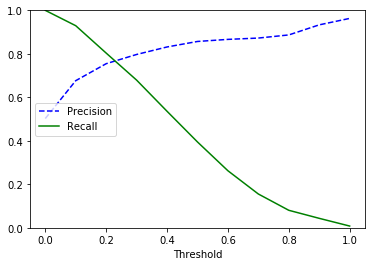

In [669]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

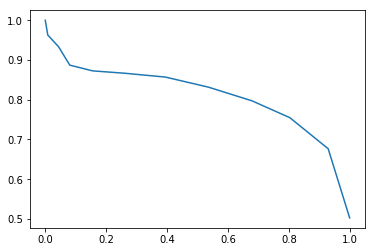

In [670]:
plt.plot(recalls, precisions)

In [711]:
y_pred_90 = (y_scores_forest > 0.1) #or 0.2

In [712]:
precision_score(y, y_pred_90)

0.7547445255474453

In [713]:
recall_score(y, y_pred_90)

0.8035436742306497

### for decision tree

In [714]:
y_pred_tree = cross_val_predict(dtc, X, y, cv=3, method='predict_proba')

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [715]:
y_scores_tree = y_pred_tree[:, 1]

In [716]:
precisions, recalls, thresholds = precision_recall_curve(y, y_scores_tree)

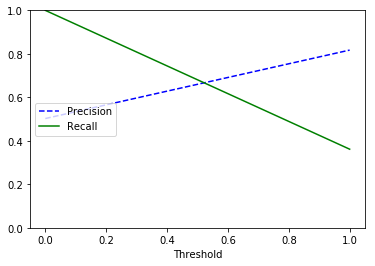

In [717]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

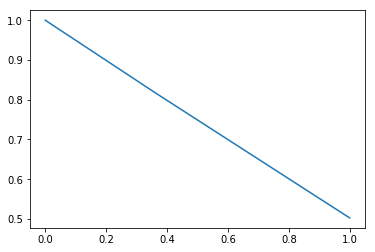

In [718]:
plt.plot(recalls, precisions)

In [725]:
y_pred_90 = (y_scores_tree > 0.2) #consstant for all values

In [726]:
precision_score(y, y_pred_90)

0.8172874209416725

In [727]:
recall_score(y, y_pred_90)

0.3615169412496114

### FOR KNN

In [728]:
y_probas_knn = cross_val_predict(knn, X, y, cv=3, 
                                 method="predict_proba")

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [729]:
y_scores_knn = y_probas_knn[:, 1] 

In [730]:
precisions, recalls, thresholds = precision_recall_curve(y, y_scores_knn)

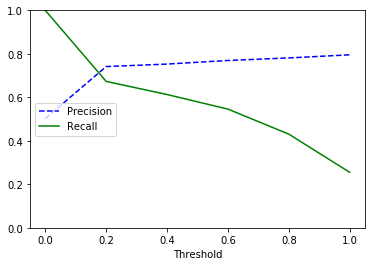

In [731]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

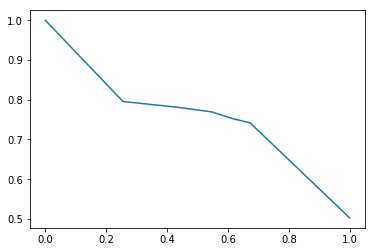

In [732]:
plt.plot(recalls, precisions)

In [763]:
y_pred_90 = (y_scores_knn > 0.1) #or 0.2


In [764]:
precision_score(y, y_pred_90)

0.7415268743580965

In [765]:
recall_score(y, y_pred_90)

0.673298103823438

### for LOG REG

In [766]:
y_probas_reg = cross_val_predict(log_reg, X, y, cv=3, 
                                 method="predict_proba")

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [767]:
y_scores_reg = y_probas_reg[:, 1] 

In [768]:
precisions, recalls, thresholds = precision_recall_curve(y, y_scores_reg)

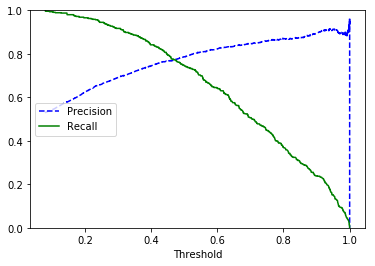

In [769]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

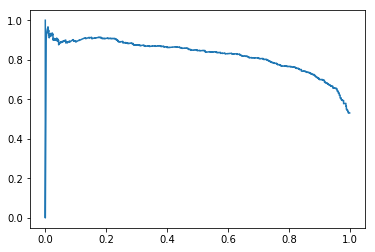

In [770]:
plt.plot(recalls, precisions)

In [788]:
y_pred_90 = (y_scores_reg > 0.4) #or 0.3

In [789]:
precision_score(y, y_pred_90)

0.7442947484190267

In [790]:
recall_score(y, y_pred_90)

0.8414672054709357

# ROC CURVE

### for random forest

In [791]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y,y_scores_forest)


# for KNN

In [792]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y,y_scores_knn)


# For LOG-REG

In [793]:
fpr_reg, tpr_reg, thresholds_reg = roc_curve(y,y_scores_reg)


### for decision tree 

In [794]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y,y_scores_tree)


In [795]:
def plot_roc_curve(fpr, tpr, label=None):
     plt.plot(fpr, tpr, linewidth=2, label=label)
     plt.plot([0, 1], [0, 1], 'k--')
     plt.axis([0, 1, 0, 1])
     plt.xlabel('False Positive Rate')
     plt.ylabel('True Positive Rate')


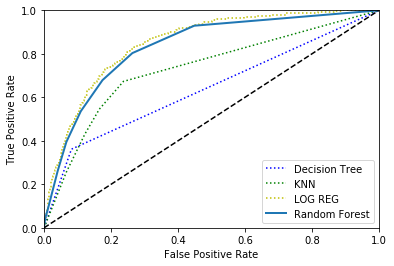

In [796]:
plt.plot(fpr_tree, tpr_tree, "b:", label="Decision Tree")
plt.plot(fpr_knn, tpr_knn, "g:", label="KNN")
plt.plot(fpr_reg, tpr_reg, "y:", label="LOG REG")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

In [797]:
roc_auc_score(y, y_scores_tree)

0.6399421440941935

In [798]:
roc_auc_score(y, y_scores_forest)

0.8319324487404776

In [799]:
roc_auc_score(y, y_scores_knn)

0.7308186639950929

In [800]:
roc_auc_score(y, y_scores_reg)

0.8506220632247543

# ON TEST DATA

In [820]:
thetest = test.copy()

In [821]:
thetest = thetest.dropna(how='all')

In [822]:
pd.isnull(thetest).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [823]:
thetest['y'].value_counts()

no     815
yes    783
Name: y, dtype: int64

In [824]:
X_test = full_pipeline.fit_transform(thetest)
y_test = output_pipeline.fit_transform(thetest)

In [825]:
X_test.shape

(1598, 17)

In [826]:
y_test.shape

(1598, 1)

In [829]:
# pred = dtc.predict(X_test)
# pred1 = rfc.predict(X_test)
# pred2 = knn.predict(X_test)
# pred3 = log_reg.predict(X_test)

In [830]:
def test_result(true_test, prediction):
    print(confusion_matrix(true_test, prediction))
    print('ACCURACY SCORE: ', accuracy_score(true_test, prediction))
    print('PRECISION: ', precision_score(true_test, prediction))
    print('RECALL: ', recall_score(true_test, prediction))

In [831]:
test_result(y_test, pred)

[[744  71]
 [477 306]]
ACCURACY SCORE:  0.6570713391739674
PRECISION:  0.8116710875331565
RECALL:  0.39080459770114945


In [832]:
test_result(y_test, pred1)

[[772  43]
 [572 211]]
ACCURACY SCORE:  0.6151439299123905
PRECISION:  0.8307086614173228
RECALL:  0.26947637292464877


In [833]:
test_result(y_test, pred2)

[[681 134]
 [359 424]]
ACCURACY SCORE:  0.6914893617021277
PRECISION:  0.7598566308243727
RECALL:  0.541507024265645


In [834]:
test_result(y_test, pred3)

[[639 176]
 [174 609]]
ACCURACY SCORE:  0.7809762202753442
PRECISION:  0.7757961783439491
RECALL:  0.7777777777777778
